In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import sys
sys.path.append('c:/Users/tomas/Documents/Programación/Github/Patricionog/Modulio')
import Foragio as fg
import Excelio as ex
import Framio as fr
import Stringio as st
import Listio as ls
import Graphio as gr

In [2]:
Paths = {'PC_Depto': 'J:/My Drive/Experimento/Plantillas finales/',
         'Notebook_Nico': '',
         'PC_Neque': '',
         'PC_Sol': '',
         'PC_Forraje': ''}

In [3]:
PC = 'PC_Depto'

Base = '1. Ballotage - Original.xlsx'

df = pd.read_excel(Paths[PC] + Base)

In [4]:
Columnas_A_Mantener = [
 'genero',
 'edad',
 'nacionalidad',
 'provincia',
 'e_social',
 'niv_educativo',
 'f_ingreso',
 'inmueble_res',
 'voto_2019',
 'voto_PASO_2023',
 'candidato_PASO_2023',
 'votara_2023',
 'afiliacion_pol',
 'autopercep_izq-der',
 'autopercep_con-pro',
 'autopercep_per-antiper',
 'cercania_Massa',
 'cercania_Milei',
#  'cercania_Bregman',
#  'cercania_Bullrich',
#  'cercania_Schiaretti',
 'massa_ip_izqder',
 'massa_ip_conpro',
 'massa_ip_rt',
 'milei_ip_izqder',
 'milei_ip_conpro',
 'milei_ip_rt',
 'indice_positividad',
 'indice_progresismo',
 'indice_progresismo_tiempo',
 'indice_conservadurismo',
 'indice_conservadurismo_tiempo',
 'cambio_op_con_der',
 'cambio_op_con_der_tiempo',
 'cambio_op_con_izq',
 'cambio_op_con_izq_tiempo',
 'cambio_op_pro_der',
 'cambio_op_pro_der_tiempo',
 'cambio_op_pro_izq',
 'cambio_op_pro_izq_tiempo',]

df = df[Columnas_A_Mantener]

In [5]:
df = df.fillna(0)

In [6]:
# Column1 = ['cambio_op_con_der', 'cambio_op_con_der_tiempo', 'cambio_op_pro_der', 'cambio_op_pro_der_tiempo']
# Column2 = ['cambio_op_con_izq', 'cambio_op_con_izq_tiempo', 'cambio_op_pro_izq', 'cambio_op_pro_izq_tiempo']
# Column3 = ['cambio_op_con', 'cambio_op_con_tiempo', 'cambio_op_pro', 'cambio_op_pro_tiempo']

# Operation = 'Average'

# for Index, Column in enumerate(Column1):
#     df = fr.Combine_Columns(df, Column1[Index], Column2[Index], Column3[Index], Operation)

In [7]:
# df_izq = df.copy()

# df_izq['Tipo_Candidato_Pro'] = 'Izquierda'
# df_izq['Tipo_Candidato_Con'] = 'Izquierda'

# Columnas_der = ['cambio_op_con_der', 'cambio_op_con_der_tiempo', 'cambio_op_pro_der', 'cambio_op_pro_der_tiempo']

# df_izq = df_izq.drop(columns=Columnas_der)

# Dict_izq = {'cambio_op_con_izq': 'cambio_op_con',
#             'cambio_op_con_izq_tiempo': 'cambio_op_con_tiempo',
#             'cambio_op_pro_izq': 'cambio_op_pro',
#             'cambio_op_pro_izq_tiempo': 'cambio_op_pro_tiempo'}

# df_izq = fr.Change_Column_Names_By_Dictionary(df_izq, Dict_izq)

# df_izq.head()


In [8]:
# df_der = df.copy()

# df_der['Tipo_Candidato_Pro'] = 'Derecha'
# df_der['Tipo_Candidato_Con'] = 'Derecha'

# Columnas_izq = ['cambio_op_con_izq', 'cambio_op_con_izq_tiempo', 'cambio_op_pro_izq', 'cambio_op_pro_izq_tiempo']

# df_der = df_der.drop(columns=Columnas_izq)

# Dict_der = {'cambio_op_con_der': 'cambio_op_con',
#             'cambio_op_con_der_tiempo': 'cambio_op_con_tiempo',
#             'cambio_op_pro_der': 'cambio_op_pro',
#             'cambio_op_pro_der_tiempo': 'cambio_op_pro_tiempo'}

# df_der = fr.Change_Column_Names_By_Dictionary(df_der, Dict_der)

# df_der.head()

In [9]:
# df_Concatenado = pd.concat([df_der, df_izq])

# df_Concatenado

In [10]:
# df_Concatenado.to_excel('J:/My Drive/Experimento/Plantillas finales/9. Ballotage - Candidatos desglosados.xlsx', index=False)

In [11]:
# df = fr.Create_Dummy_Variables_In_All_DataFrame(df)

In [12]:
df = fr.Replace_Values_In_Name_Columns(df, ['á', 'é', 'í', 'ó', 'ú', '-', ' ', 'ñ'], ['a', 'e', 'i', 'o', 'u', '_', '_', 'ni'])

In [13]:
df = fr.Casing_Column_Names(df, Separator = "_")

In [14]:
df = fr.Replace_Values_In_Name_Columns(df, ['Ciudad_Autonoma_De_Buenos_Aires'], ['CABA'])

In [15]:
# Mayúscula a todas las palabras.
for Column in df.columns:
    if df[Column].dtype == 'object':
        df[Column] = df[Column].str.title()

In [16]:
df.head()

,Genero,Edad,Nacionalidad,Provincia,E_Social,Niv_Educativo,F_Ingreso,Inmueble_Res,Voto_2019,Voto_Paso_2023,...,Indice_Conservadurismo,Indice_Conservadurismo_Tiempo,Cambio_Op_Con_Der,Cambio_Op_Con_Der_Tiempo,Cambio_Op_Con_Izq,Cambio_Op_Con_Izq_Tiempo,Cambio_Op_Pro_Der,Cambio_Op_Pro_Der_Tiempo,Cambio_Op_Pro_Izq,Cambio_Op_Pro_Izq_Tiempo
0,Masculino,16,Argentina,Buenos Aires,Medio Alto,Secundario,Sustento Familiar,Familia - Padres,Prefiero No Decirlo,Si,...,2.888889,10.471000,-1.000000,-7.787250,-1.0,-2.6000,-0.333333,-0.233000,-0.400000,-3.6198
1,Masculino,16,Argentina,Catamarca,Medio Alto,Secundario,Sustento Familiar,Vivo Con Mis Padres,Mauricio Macri,Si,...,3.111111,6.442556,4.000000,-1.930250,2.4,-0.9816,0.200000,-1.400000,-0.800000,2.1486
2,Masculino,16,Argentina,Ciudad Autónoma De Buenos Aires,Medio,Secundario,Sustento Familiar,Propio,No Vote,No,...,1.900000,5.502800,1.600000,2.903000,1.5,-2.8140,-1.800000,-1.348600,-2.000000,-1.6836
3,Masculino,16,Argentina,Entre Ríos,Medio,Secundario,Sustento Familiar,Propio,No Vote,No,...,2.777778,12.325111,-1.166667,-6.948500,-0.8,-8.8224,0.500000,-1.047750,0.750000,1.3895
4,Femenino,16,Argentina,Buenos Aires,Bajo Medio,Secundario,Sustento Familiar,Propio,No Vote,Si,...,1.666667,9.224889,-0.333333,4.276333,0.0,-3.0515,0.714286,-1.575714,0.714286,-1.0940


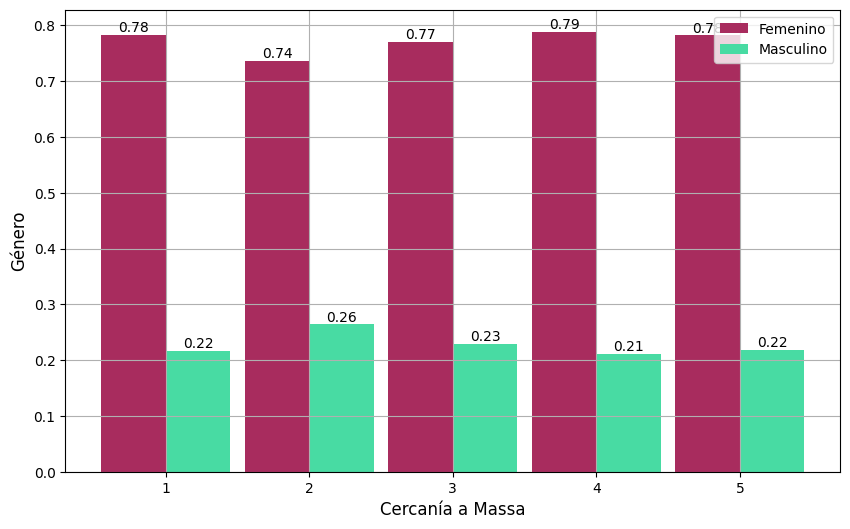

In [17]:
gr.Create_Bar_Plot(X=df['Cercania_Massa'], 
                Z=df['Genero'],
                Z_Group_Small_Categories = True,
                Z_Remove_Others = True,
                X_Label = 'Cercanía a Massa',
                Y_Label = 'Género',
                X_Ticks_Rotation = 0,
                Normalize = True,
                Normalize_By_X=True,
                Bar_Width = 0.9,
               # X_Ranges = [1, 2, 3, 4, 5],
                Annotations=True)
